In [ ]:
# Siyi Qian 200012298709
# Chenting Zhang 200205146202

In [1]:
import numpy as np
import maze_result as mz
import matplotlib.pyplot as plt

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
# with the convention
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [3]:
# Create an environment maze
# env = mz.Maze(maze, minotaur_stay=True)
env = mz.Maze(maze, minotaur_stay=False)

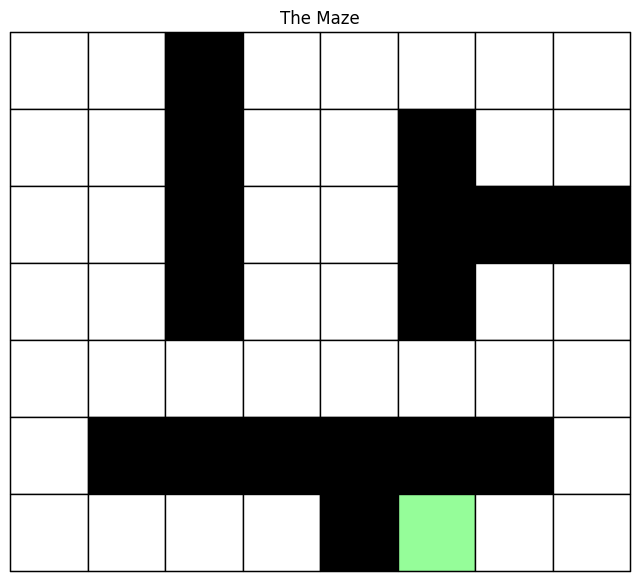

In [4]:
mz.draw_maze(maze)

In [5]:
# Finite horizon MDP
horizon = 20
V, policy = mz.dynamic_programming(env, horizon)

In [6]:
start  = (0, 0, 6, 5)
path = env.simulate(start, policy, method='DynProg')

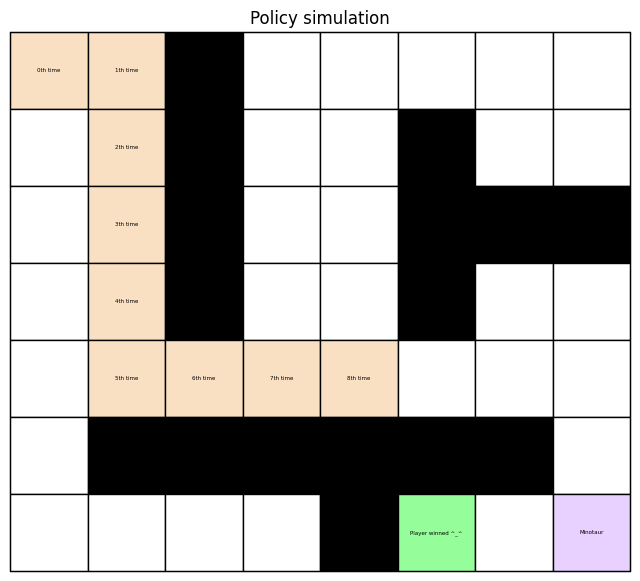

In [7]:
mz.animate_solution(maze, path)

1th 0.0
2th 0.0
3th 0.0
4th 0.0
5th 0.0
6th 0.0
7th 0.0
8th 0.0
9th 0.0
10th 0.0
11th 0.0
12th 0.0
13th 0.0
14th 0.0
15th 0.2757
16th 0.4219
17th 0.5114
18th 0.5926
19th 0.6621
20th 0.7225
21th 0.7726
22th 0.8058
23th 0.8281
24th 0.8655
25th 0.8847
26th 0.8982
27th 0.9166
28th 0.9274
29th 0.937
30th 0.946


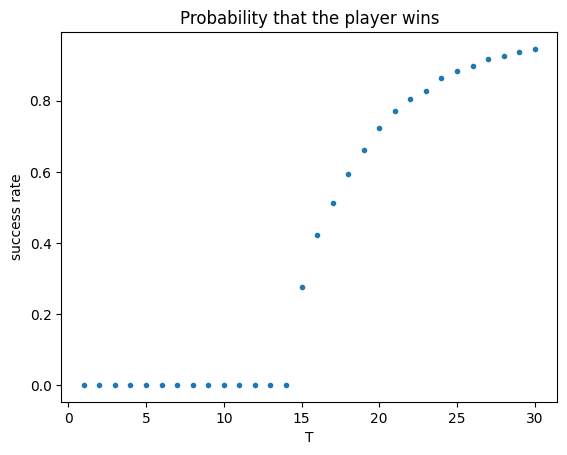

In [8]:
mz.success_rate(maze, minotaur_stay=True, method='DynProg', horizon=30)

1th 0.0
2th 0.0
3th 0.0
4th 0.0
5th 0.0
6th 0.0
7th 0.0
8th 0.0
9th 0.0
10th 0.0
11th 0.0
12th 0.0
13th 0.0
14th 0.0
15th 1.0
16th 1.0
17th 1.0
18th 1.0
19th 1.0
20th 1.0
21th 1.0
22th 1.0
23th 1.0
24th 1.0
25th 1.0
26th 1.0
27th 1.0
28th 1.0
29th 1.0
30th 1.0


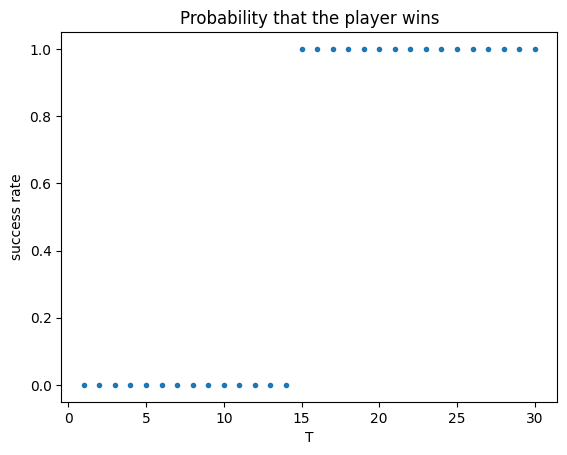

In [9]:
mz.success_rate(maze, minotaur_stay=False, method='DynProg', horizon=30)

## Survival probability (maximum probability of exiting the maze as a function of T)

## Value Iteration

Here we solve the discounted infinite-horizon MDP problem using value iteration, the objective here is to find a stationary policy $\pi$ that minimizes the infinite horizon objective with a discount factor $\gamma$ 
$$
    \mathbb{E} \Big[\sum_{t=0}^\infty \gamma^t r\big(s_t, \pi(s_t)\big) \Big].
$$
Recall the Bellman equation in the case of a stationary policy $\pi$ 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V^*(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V^*(s') \Big\rbrace
\end{equation}
or equivalently in terms of the Bellman operator $\mathcal{L}$ 
\begin{equation}
V^* =  \mathcal{L}(V^*)
\end{equation}
where 
\begin{equation}
   \forall s \in \mathcal{S} \qquad  \mathcal{L}(V)(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V(s') \Big\rbrace. 
\end{equation}
Value iteration solves the Bellman equation described above. This method is implemented as `maze.value_iteration` in the file [maze.py](maze.py).

> **Note:** Recall that the mapping $\mathcal{L}$ is a contraction, therefore value iteration converges. To achieve an $\varepsilon>0$ approximation (i.e. $\Vert V^* - V_{n+1} \Vert \le \varepsilon$),
 the stopping criterion of value iteration is $\Vert V - \mathcal{L}(V) \Vert < \frac{1-\gamma}{\gamma}\varepsilon$.

In [2]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
gamma = 29/30
epsilon = 0.0001
num_simulations = 10000

In [3]:
env = mz.Maze(maze, minotaur_stay=False)
V, policy = mz.value_iteration(env, gamma=gamma, epsilon=epsilon)

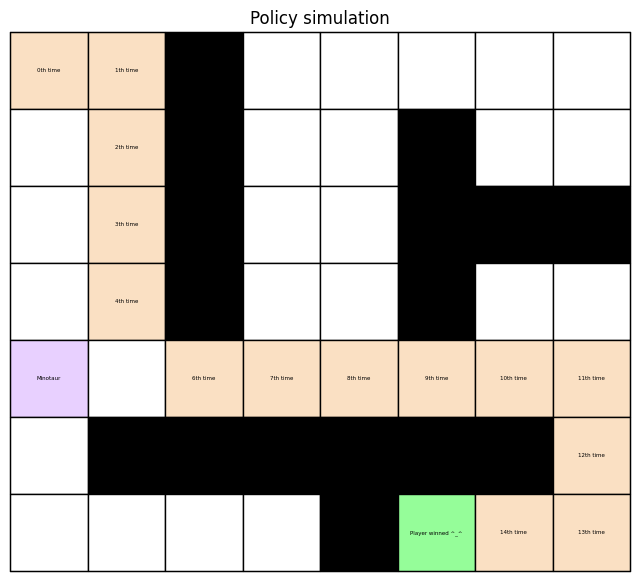

In [4]:
start  = (0, 0, 6, 5)
path = env.simulate(start, policy, gamma=gamma, method='ValIter')
mz.animate_solution(maze, path)

In [5]:
mz.success_rate(maze, minotaur_stay=False, method='ValIter', horizon=30, gamma=gamma, epsilon=epsilon)

0.6177


In [6]:
mz.success_rate(maze, minotaur_stay=True, method='ValIter', horizon=30, gamma=gamma, epsilon=epsilon)

0.5511
